In [2]:
import pandas as pd

In [3]:
df_2013 = pd.read_csv('psam_p25_2013.csv')
df_2014 = pd.read_csv('psam_p25_2014.csv')
df_2015 = pd.read_csv('psam_p25_2015.csv')
df_2016 = pd.read_csv('psam_p25_2016.csv')
df_2017 = pd.read_csv('psam_p25_2017.csv')
df_2018 = pd.read_csv('psam_p25_2018.csv')
df_2019 = pd.read_csv('psam_p25_2019.csv')
df_2020 = pd.read_csv('psam_p25_2020.csv')
df_2021 = pd.read_csv('psam_p25_2021.csv')

/var/folders/3q/g5yk9cxd5rdc0gry4j6129v40000gn/T/ipykernel_14579/26858416.py:1: DtypeWarning: Columns (109,110) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2013 = pd.read_csv('psam_p25_2013.csv')
/var/folders/3q/g5yk9cxd5rdc0gry4j6129v40000gn/T/ipykernel_14579/26858416.py:2: DtypeWarning: Columns (108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2014 = pd.read_csv('psam_p25_2014.csv')
/var/folders/3q/g5yk9cxd5rdc0gry4j6129v40000gn/T/ipykernel_14579/26858416.py:3: DtypeWarning: Columns (108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2015 = pd.read_csv('psam_p25_2015.csv')
/var/folders/3q/g5yk9cxd5rdc0gry4j6129v40000gn/T/ipykernel_14579/26858416.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2018 = pd.read_csv('psam_p25_2018.csv')
/var/folders/3q/g5yk9cxd5rdc0gry4j6129v40000gn/T/ipykernel_14579/26858416.py:7: Dt

In [4]:
# Delete NAN in JWMNP
df_2013 = df_2013.dropna(subset=['JWMNP'])
df_2014 = df_2014.dropna(subset=['JWMNP'])
df_2015 = df_2015.dropna(subset=['JWMNP'])
df_2016 = df_2016.dropna(subset=['JWMNP'])
df_2017 = df_2017.dropna(subset=['JWMNP'])
df_2018 = df_2018.dropna(subset=['JWMNP'])
df_2019 = df_2019.dropna(subset=['JWMNP'])
df_2020 = df_2020.dropna(subset=['JWMNP'])
df_2021 = df_2021.dropna(subset=['JWMNP'])


In [22]:
dataframes = {
    '2013': df_2013,
    '2014': df_2014,
    '2015': df_2015,
    '2016': df_2016,
    '2017': df_2017,
    '2018': df_2018,
}

average_jwmnp_values = {}

for year, df in dataframes.items():
    # filter JWTRNS=02
    df_filtered = df[df['JWTR'] == 2]

    for rac1p_value in [1, 2]:
        condition = df_filtered['RAC1P'] == rac1p_value
        average_jwmnp = df_filtered[condition]['JWMNP'].mean()
        average_jwmnp_values[f"{year}, RAC1P={rac1p_value}"] = average_jwmnp


In [23]:
dataframes = {
    '2019': df_2019,
    '2020': df_2020,
    '2021': df_2021
}

for year, df in dataframes.items():
    # filter JWTRNS=02
    df_filtered = df[df['JWTRNS'] == 2]

    for rac1p_value in [1, 2]:
        condition = df_filtered['RAC1P'] == rac1p_value
        average_jwmnp = df_filtered[condition]['JWMNP'].mean()
        average_jwmnp_values[f"{year}, RAC1P={rac1p_value}"] = average_jwmnp
        
for key, value in average_jwmnp_values.items():
    print(f"Average JWMNP for {key}: {value}")


Average JWMNP for 2013, RAC1P=1: 38.30573248407644
Average JWMNP for 2013, RAC1P=2: 47.769911504424776
Average JWMNP for 2014, RAC1P=1: 38.98692810457516
Average JWMNP for 2014, RAC1P=2: 45.735264735264735
Average JWMNP for 2015, RAC1P=1: 39.831717451523545
Average JWMNP for 2015, RAC1P=2: 46.01587301587302
Average JWMNP for 2016, RAC1P=1: 40.03766413268832
Average JWMNP for 2016, RAC1P=2: 45.56928508384819
Average JWMNP for 2017, RAC1P=1: 40.3446385748544
Average JWMNP for 2017, RAC1P=2: 45.95731153496821
Average JWMNP for 2018, RAC1P=1: 40.648849797023004
Average JWMNP for 2018, RAC1P=2: 46.08083560399637
Average JWMNP for 2019, RAC1P=1: 40.925135501355015
Average JWMNP for 2019, RAC1P=2: 45.685009487666036
Average JWMNP for 2020, RAC1P=1: 40.475467289719624
Average JWMNP for 2020, RAC1P=2: 44.53224043715847
Average JWMNP for 2021, RAC1P=1: 40.74730215827338
Average JWMNP for 2021, RAC1P=2: 44.737041719342606


In [24]:
total_travel_time = {}
for key, average_jwmnp in average_jwmnp_values.items():
    # Using the formula (Average JWMNP * 2 * 5 * 50) / 60
    yearly_travel_time = (average_jwmnp * 2 * 5 * 50) / 60
    total_travel_time[key] = yearly_travel_time
total_travel_time

{'2013, RAC1P=1': 319.2144373673036,
 '2013, RAC1P=2': 398.0825958702065,
 '2014, RAC1P=1': 324.8910675381264,
 '2014, RAC1P=2': 381.1272061272061,
 '2015, RAC1P=1': 331.9309787626962,
 '2015, RAC1P=2': 383.46560846560845,
 '2016, RAC1P=1': 333.647201105736,
 '2016, RAC1P=2': 379.74404236540164,
 '2017, RAC1P=1': 336.20532145711996,
 '2017, RAC1P=2': 382.9775961247351,
 '2018, RAC1P=1': 338.7404149751917,
 '2018, RAC1P=2': 384.0069633666364,
 '2019, RAC1P=1': 341.0427958446251,
 '2019, RAC1P=2': 380.708412397217,
 '2020, RAC1P=1': 337.29556074766356,
 '2020, RAC1P=2': 371.10200364298726,
 '2021, RAC1P=1': 339.5608513189448,
 '2021, RAC1P=2': 372.80868099452175}

### T Test

In [25]:
# Organizing the data into a structured format for the table
years = sorted(set(key.split(", ")[0] for key in total_travel_time.keys()))
table_data = {year: {'White': None, 'Black': None} for year in years}

for key, value in total_travel_time.items():
    year, race = key.split(", ")
    race = 'White' if race == 'RAC1P=1' else 'Black'
    table_data[year][race] = value

# Convert the dictionary to a pandas DataFrame
df = pd.DataFrame.from_dict(table_data, orient='index')
df.index.rename('Year', inplace=True)
df = df.reset_index()

# Exporting to CSV
df.to_csv('T_test.csv')
df['Year']=df['Year'].astype("int")
df

,Year,White,Black
0,2013,319.214437,398.082596
1,2014,324.891068,381.127206
2,2015,331.930979,383.465608
3,2016,333.647201,379.744042
4,2017,336.205321,382.977596
5,2018,338.740415,384.006963
6,2019,341.042796,380.708412
7,2020,337.295561,371.102004
8,2021,339.560851,372.808681


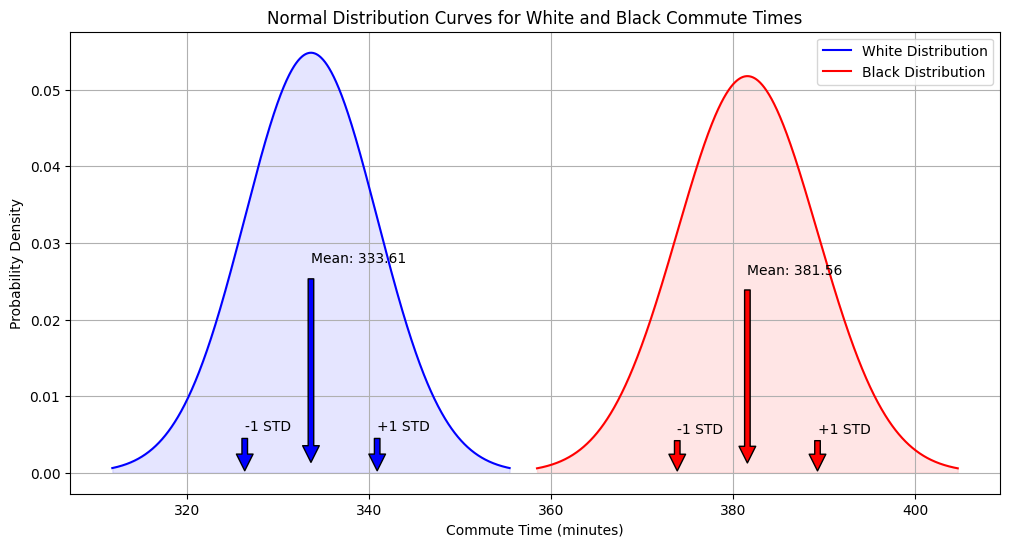

In [26]:
# Plotting the normal distribution curve for White and Black commute times separately
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
# Separate mean and standard deviation for White and Black
mean_white = df['White'].mean()
std_white = df['White'].std()
mean_black = df['Black'].mean()
std_black = df['Black'].std()

# Generating points on the x axis for White and Black
x_white = np.linspace(mean_white - 3*std_white, mean_white + 3*std_white, 1000)
x_black = np.linspace(mean_black - 3*std_black, mean_black + 3*std_black, 1000)

# Calculating the y values for the normal distribution for White and Black
y_white = stats.norm.pdf(x_white, mean_white, std_white)
y_black = stats.norm.pdf(x_black, mean_black, std_black)

plt.figure(figsize=(12,6))

# White distribution
plt.plot(x_white, y_white, label='White Distribution', color='blue')
plt.fill_between(x_white, y_white, color='blue', alpha=0.1)

# Black distribution
plt.plot(x_black, y_black, label='Black Distribution', color='red')
plt.fill_between(x_black, y_black, color='red', alpha=0.1)

# Adding annotations for White distribution
plt.annotate(f'Mean: {mean_white:.2f}', xy=(mean_white, 0), xytext=(mean_white, max(y_white)/2),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate(f'+1 STD', xy=(mean_white + std_white, 0), xytext=(mean_white + std_white, max(y_white)/10),
             arrowprops=dict(facecolor='blue', shrink=0.05))
plt.annotate(f'-1 STD', xy=(mean_white - std_white, 0), xytext=(mean_white - std_white, max(y_white)/10),
             arrowprops=dict(facecolor='blue', shrink=0.05))

# Adding annotations for Black distribution
plt.annotate(f'Mean: {mean_black:.2f}', xy=(mean_black, 0), xytext=(mean_black, max(y_black)/2),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate(f'+1 STD', xy=(mean_black + std_black, 0), xytext=(mean_black + std_black, max(y_black)/10),
             arrowprops=dict(facecolor='red', shrink=0.05))
plt.annotate(f'-1 STD', xy=(mean_black - std_black, 0), xytext=(mean_black - std_black, max(y_black)/10),
             arrowprops=dict(facecolor='red', shrink=0.05))

plt.title('Normal Distribution Curves for White and Black Commute Times')
plt.xlabel('Commute Time (minutes)')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
stats = df.describe()
stats = stats.drop(columns='Year')
stats

,White,Black
count,9.000000,9.000000
mean,333.614292,381.558123
std,7.274713,7.703815
min,319.214437,371.102004
25%,331.930979,379.744042
50%,336.205321,381.127206
75%,338.740415,383.465608
max,341.042796,398.082596


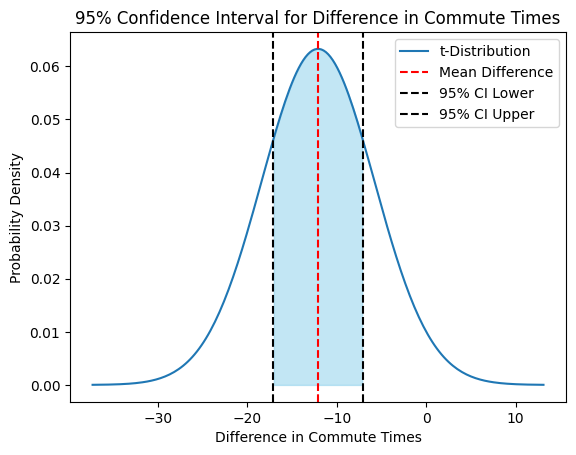

(-4.331535857081992,
 0.00470223929757063,
 -17.15605858491724,
 -7.040666575220106)

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, norm
from scipy.stats import ttest_ind

# Converting 'Year' column to integers
df['Year'] = df['Year'].astype(int)

pre_pandemic_data = df[(df['Year'] >= 2014) & (df['Year'] <= 2020)]
during_pandemic_data = df[df['Year'] >= 2020]

# Calculate the difference in commute times for pre-pandemic and during-pandemic
pre_pandemic_diff = pre_pandemic_data['White'] - pre_pandemic_data['Black']
during_pandemic_diff = during_pandemic_data['White'] - during_pandemic_data['Black']

# Perform t-test
t_stat, p_value = ttest_ind(pre_pandemic_diff, during_pandemic_diff, equal_var=False)

# Calculate the degrees of freedom to use in the t-distribution
# Welch-Satterthwaite equation
df = ((np.var(pre_pandemic_diff)/len(pre_pandemic_diff) + np.var(during_pandemic_diff)/len(during_pandemic_diff))**2 /
      ((np.var(pre_pandemic_diff)/len(pre_pandemic_diff))**2 / (len(pre_pandemic_diff)-1) +
       (np.var(during_pandemic_diff)/len(during_pandemic_diff))**2 / (len(during_pandemic_diff)-1)))

# Calculate the critical t-value for a 95% confidence interval
t_crit = np.abs(norm.ppf((1-0.95)/2))  # two-tailed

# Calculate the pooled standard deviation
pooled_std = np.sqrt(((len(pre_pandemic_diff) - 1)*np.var(pre_pandemic_diff) +
                      (len(during_pandemic_diff) - 1)*np.var(during_pandemic_diff)) /
                     (len(pre_pandemic_diff) + len(during_pandemic_diff) - 2))

# Calculate the standard error of the difference in means
std_error_diff = np.sqrt(np.var(pre_pandemic_diff)/len(pre_pandemic_diff) +
                         np.var(during_pandemic_diff)/len(during_pandemic_diff))

# The mean difference in commute times
mean_diff = np.mean(pre_pandemic_diff) - np.mean(during_pandemic_diff)

# The margin of error for the 95% CI
margin_of_error = t_crit * std_error_diff

# 95% CI lower and upper bounds
ci_lower = mean_diff - margin_of_error
ci_upper = mean_diff + margin_of_error

# Plotting
fig, ax = plt.subplots()

# Range of x values for plotting the t-distribution
x = np.linspace(mean_diff - 4*pooled_std, mean_diff + 4*pooled_std, 200)

# Plot the t-distribution
ax.plot(x, norm.pdf(x, mean_diff, pooled_std), label='t-Distribution')

# Fill the confidence interval
ax.fill_between(x, norm.pdf(x, mean_diff, pooled_std), where=(x > ci_lower) & (x < ci_upper), color='skyblue', alpha=0.5)

# Add a line for the mean difference
ax.axvline(mean_diff, color='red', linestyle='--', label='Mean Difference')

# Add lines for the confidence interval bounds
ax.axvline(ci_lower, color='black', linestyle='--', label='95% CI Lower')
ax.axvline(ci_upper, color='black', linestyle='--', label='95% CI Upper')

# Labels and title
ax.set_xlabel('Difference in Commute Times')
ax.set_ylabel('Probability Density')
ax.set_title('95% Confidence Interval for Difference in Commute Times')

# Add a legend
ax.legend()

# Show plot
plt.show()

# Return the t-statistic and p-value
t_stat, p_value, ci_lower, ci_upper


### Visualization 1

In [29]:
import matplotlib.pyplot as plt
# Calculating the difference in total travel time between RAC1P=2 and RAC1P=1 for each year
travel_time_difference = {}

for year in range(2013, 2022):  # Looping through the years 2017 to 2021
    white = f"{year}, RAC1P=1"
    black = f"{year}, RAC1P=2"

    # Calculate the difference if both keys exist in the dictionary
    if white in total_travel_time and black in total_travel_time:
        difference = total_travel_time[black] - total_travel_time[white]
        travel_time_difference[year] = difference
travel_time_difference

{2013: 78.86815850290287,
 2014: 56.2361385890797,
 2015: 51.53462970291224,
 2016: 46.096841259665666,
 2017: 46.772274667615136,
 2018: 45.2665483914447,
 2019: 39.66561655259187,
 2020: 33.8064428953237,
 2021: 33.24782967557695}

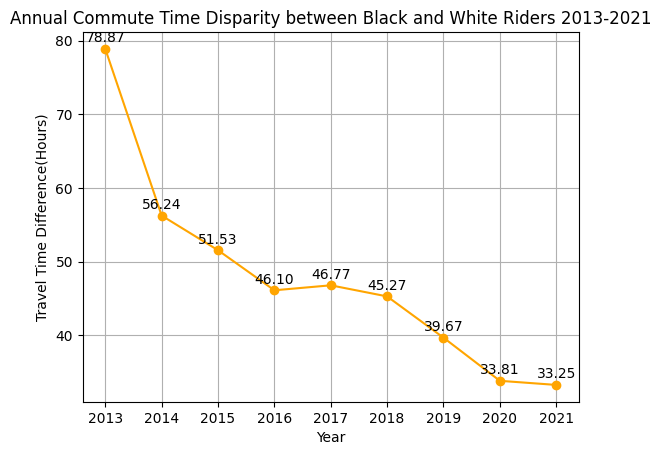

In [30]:
# Extracting years and differences
years = list(travel_time_difference.keys())
differences = list(travel_time_difference.values())

# Plotting the line graph
plt.plot(years, differences, marker='o', linestyle='-', color='orange')
plt.title('Annual Commute Time Disparity between Black and White Riders 2013-2021')
plt.xlabel('Year')
plt.ylabel('Travel Time Difference(Hours)')

# Annotating each point with its numerical value
for year, difference in zip(years, differences):
    plt.annotate(f'{difference:.2f}', (year, difference), textcoords="offset points", xytext=(0, 5), ha='center')

plt.grid(True)
plt.show()

### Calculate the time difference for balck and white riders(2017-2021)

In [31]:
average_difference_2017_2021 = round(sum(travel_time_difference[year] for year in range(2017, 2022)))
average_difference_2017_2021

199

In [32]:
# Calculating the average of the yearly differences from 2017 to 2021
average_difference_2017_2021 = round(sum(travel_time_difference[year] for year in range(2017, 2022)) / 5)
print(f'Bus Commute Disparity between Black and White Riders(2017-2021):', average_difference_2017_2021, f'hours')

Bus Commute Disparity between Black and White Riders(2017-2021): 40 hours


### Visualization 2

In [33]:
data = total_travel_time

data_rac1p1 = {}
data_rac1p2 = {}

for key, value in data.items():
    year, rac1p = key.replace('Average JWMNP for ', '').split(', RAC1P=')
    if rac1p == '1':
        data_rac1p1[year] = value
    elif rac1p == '2':
        data_rac1p2[year] = value

years_rac1p1 = list(data_rac1p1.keys())
values_rac1p1 = list(data_rac1p1.values())

years_rac1p2 = list(data_rac1p2.keys())
values_rac1p2 = list(data_rac1p2.values())


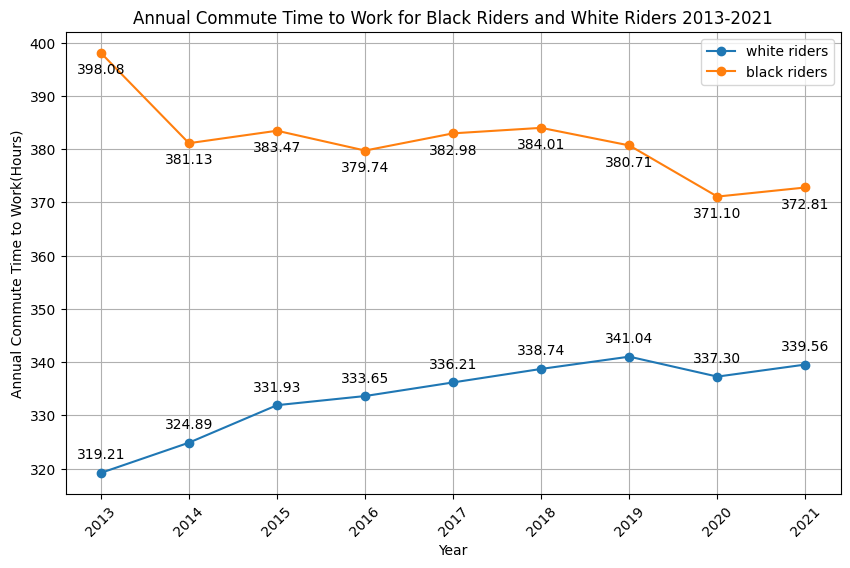

In [34]:
plt.figure(figsize=(10, 6))
plt.plot(years_rac1p1, values_rac1p1, label='white riders', marker='o')
plt.plot(years_rac1p2, values_rac1p2, label='black riders', marker='o')

# Annotate data points with numerical values
for year, value in zip(years_rac1p1, values_rac1p1):
    plt.annotate(f'{value:.2f}', (year, value), textcoords="offset points", xytext=(0,10), ha='center')

for year, value in zip(years_rac1p2, values_rac1p2):
    plt.annotate(f'{value:.2f}', (year, value), textcoords="offset points", xytext=(0,-15), ha='center')

plt.xlabel('Year')
plt.ylabel('Annual Commute Time to Work(Hours)')
plt.title('Annual Commute Time to Work for Black Riders and White Riders 2013-2021')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

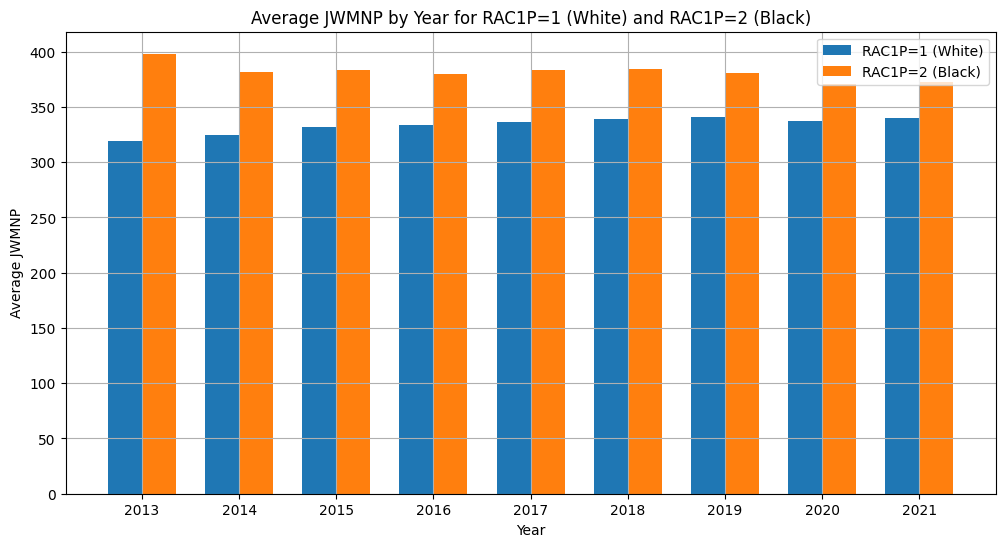

In [35]:
plt.figure(figsize=(12, 6))
bar_width = 0.35

index = range(len(years_rac1p1))

plt.bar(index, values_rac1p1, bar_width, label='RAC1P=1 (White)')
plt.bar([i + bar_width for i in index], values_rac1p2, bar_width, label='RAC1P=2 (Black)')

# Adding details to the plot
plt.xlabel('Year')
plt.ylabel('Average JWMNP')
plt.title('Average JWMNP by Year for RAC1P=1 (White) and RAC1P=2 (Black)')
plt.xticks([i + bar_width / 2 for i in index], years_rac1p1)
plt.legend()
plt.grid(True)
plt.show()
